## Identifying and correcting skew

Let's try to understand the skew of each coloum and try to correct some.  First we'll load the necessary libraries and the data.

In [9]:
import db_utils as dbu
import numpy as np
import pandas as pd
import seaborn as sns
df = dbu.csv_to_df('loan_payments_no_null.csv')

In [2]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,term_numerical,fully_funded,employment_length_numerical
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL,36,1,5
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL,36,1,9
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL,36,1,8
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL,36,1,1
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL,36,1,10


In [3]:
dfnum = df.select_dtypes(include=['number'])

Now let's use pandas skew function:

In [4]:
dfnum.skew()

id                              2.362249
member_id                       2.198702
loan_amount                     0.803496
funded_amount                   0.819432
funded_amount_inv               0.813451
int_rate                        0.454895
instalment                      0.994859
annual_inc                      8.552363
dti                             0.191730
delinq_2yrs                     5.337343
inq_last_6mths                  3.010718
open_accounts                   1.055274
total_accounts                  0.774550
out_prncp                       2.358646
out_prncp_inv                   2.359055
total_payment                   1.270207
total_payment_inv               1.259942
total_rec_prncp                 1.260454
total_rec_int                   2.205162
total_rec_late_fee             13.513364
recoveries                     14.506939
collection_recovery_fee        27.683598
last_payment_amount             2.491679
collections_12_mths_ex_med     20.171745
policy_code     

We can also visualise this with some graphs:


In [5]:
dfnum_plot = dbu.Plotter(dfnum) 

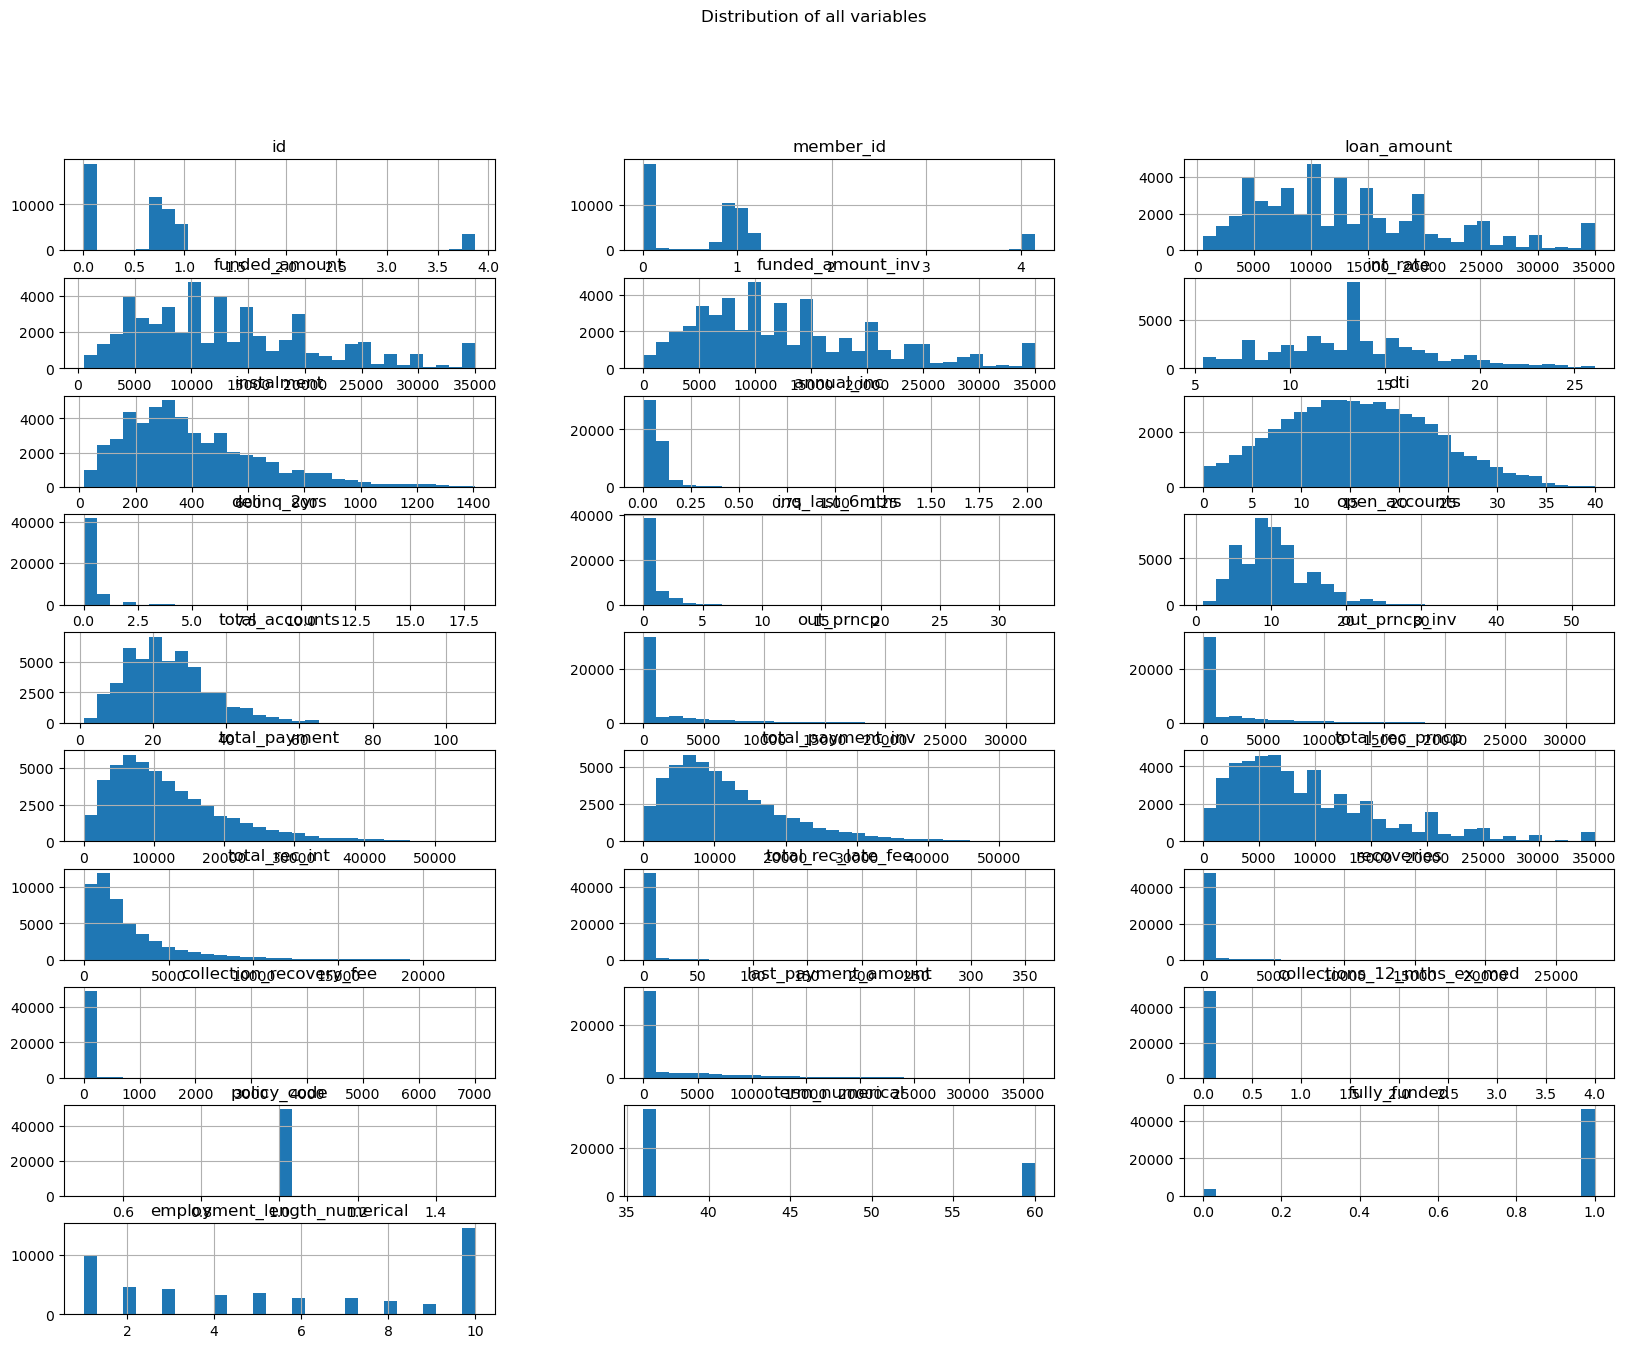

In [6]:
dfnum_plot.plot_distribution()

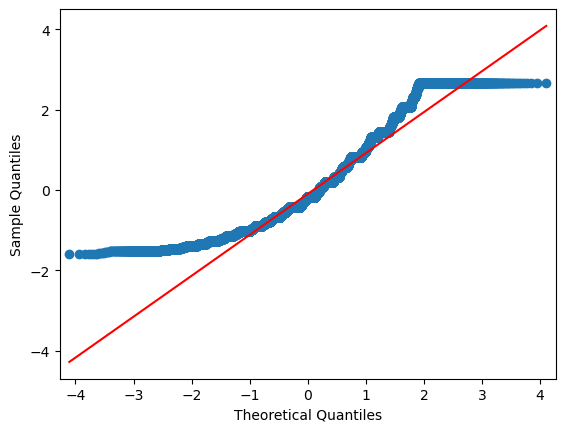

In [7]:
dfnum_plot.qqplot('loan_amount')

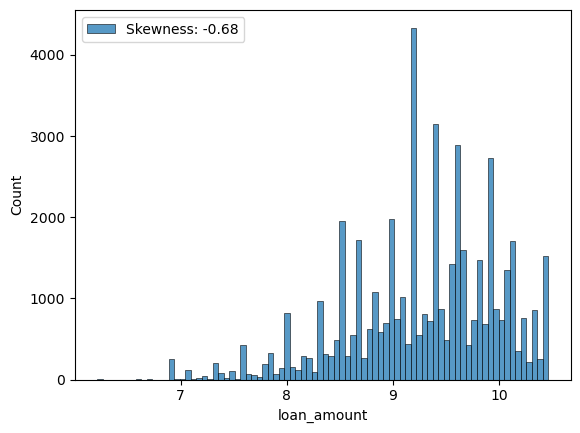

In [10]:
log_loan_amount = df["loan_amount"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_loan_amount,label="Skewness: %.2f"%(log_loan_amount.skew()) )
t.legend()

We've transformed the loan amount with a log transformation and it's gone from 0.8 to -0.7 so it hasn't been that effective.

Prehaps we should focus on the columns with |skew|>2.

Let's focus on:

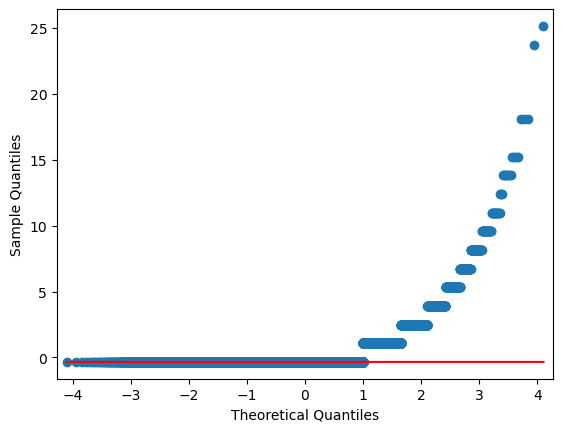

In [11]:
dfnum_plot.qqplot('delinq_2yrs')

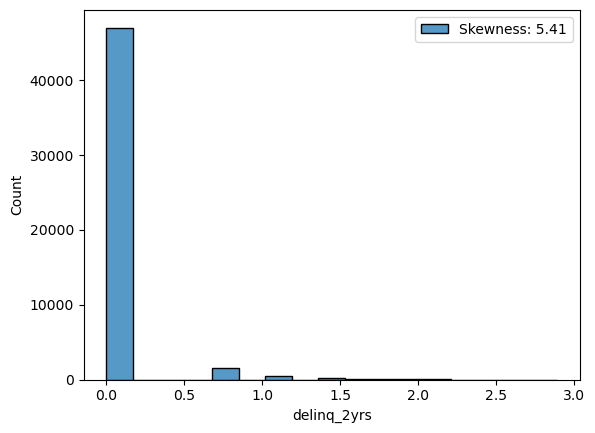

In [12]:
log_delinq_2yrs = df["delinq_2yrs"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_delinq_2yrs,label="Skewness: %.2f"%(log_delinq_2yrs.skew()) )
t.legend()

The log transformation has made it worse.